## git

In [0]:
!git clone https://github.com/JamieMaple/cyclegan-with-style-cnn

Cloning into 'cyclegan-with-style-cnn'...
remote: Enumerating objects: 1046, done.
remote: Counting objects: 100% (1046/1046), done.
remote: Compressing objects: 100% (1031/1031), done.
remote: Total 1046 (delta 7), reused 1046 (delta 7), pack-reused 0
Receiving objects: 100% (1046/1046), 3.85 MiB | 3.03 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [0]:
import os
os.chdir('/content/cyclegan-with-style-cnn')

## 训练

In [0]:
!python main.py --training True --epochs 45 --decay_epoch 45

True
Training
Network initialized with weights sampled from N(0,0.02).
/content/cyclegan-with-style-cnn/arch/ops.py:19: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, 0.0, gain)
/content/cyclegan-with-style-cnn/arch/ops.py:21: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias.data, 0.0)
Network initialized with weights sampled from N(0,0.02).
Network initialized with weights sampled from N(0,0.02).
Network initialized with weights sampled from N(0,0.02).
------------Number of Parameters---------------
[Network Gab] Total number of parameters : 11.378 M
[Network Gba] Total number of parameters : 11.378 M
[Network Da] Total number of parameters : 2.765 M
[Network Db] Total number of parameters : 2.765 M
-----------------------------------------------
Traceback (most recent call last):
  File "main.py", line 59, in <module>
    main()
  File "main.py", line 51, in main
    model = 

In [0]:
!rm -r ./checkpoints/

In [0]:
!pwd

/content/cyclegan-with-style-cnn


In [0]:
!git config --global user.email "jamiemaple007@gmail.com"
!git config --global user.name "maple"
!git add .
!git commit -m "train"

[master cdd3eea] train
 13 files changed, 4 insertions(+)
 create mode 100644 __pycache__/model.cpython-36.pyc
 create mode 100644 __pycache__/test.cpython-36.pyc
 create mode 100644 __pycache__/utils.cpython-36.pyc
 create mode 100644 __pycache__/vgg.cpython-36.pyc
 create mode 100644 arch/__pycache__/__init__.cpython-36.pyc
 create mode 100644 arch/__pycache__/discriminators.cpython-36.pyc
 create mode 100644 arch/__pycache__/generators.cpython-36.pyc
 create mode 100644 arch/__pycache__/ops.cpython-36.pyc
 create mode 100644 checkpoints/fonts/latest.ckpt
 create mode 120000 datasets/horse2zebra/ltestA/Link
 create mode 120000 datasets/horse2zebra/ltestB/Link
 create mode 120000 datasets/horse2zebra/ltrainA/Link
 create mode 120000 datasets/horse2zebra/ltrainB/Link


In [0]:
!git remote -vv

origin	https://github.com/JamieMaple/cyclegan-with-style-cnn (fetch)
origin	https://github.com/JamieMaple/cyclegan-with-style-cnn (push)


In [0]:
!git push origin master

fatal: could not read Username for 'https://github.com': No such device or address


In [0]:
!zip -r ckpt.zip ./checkpoints

  adding: checkpoints/ (stored 0%)
  adding: checkpoints/fonts/ (stored 0%)
  adding: checkpoints/fonts/latest.ckpt (deflated 7%)


## 挂载

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import vgg

In [5]:
vgg.draw_vgg()

In [8]:

import torch
from torch import nn
from torchviz import make_dot, make_dot_from_trace

model = vgg.vgg

x = torch.randn(1, 3, 256, 256)

make_dot(model(x), params=dict(model.named_parameters()))

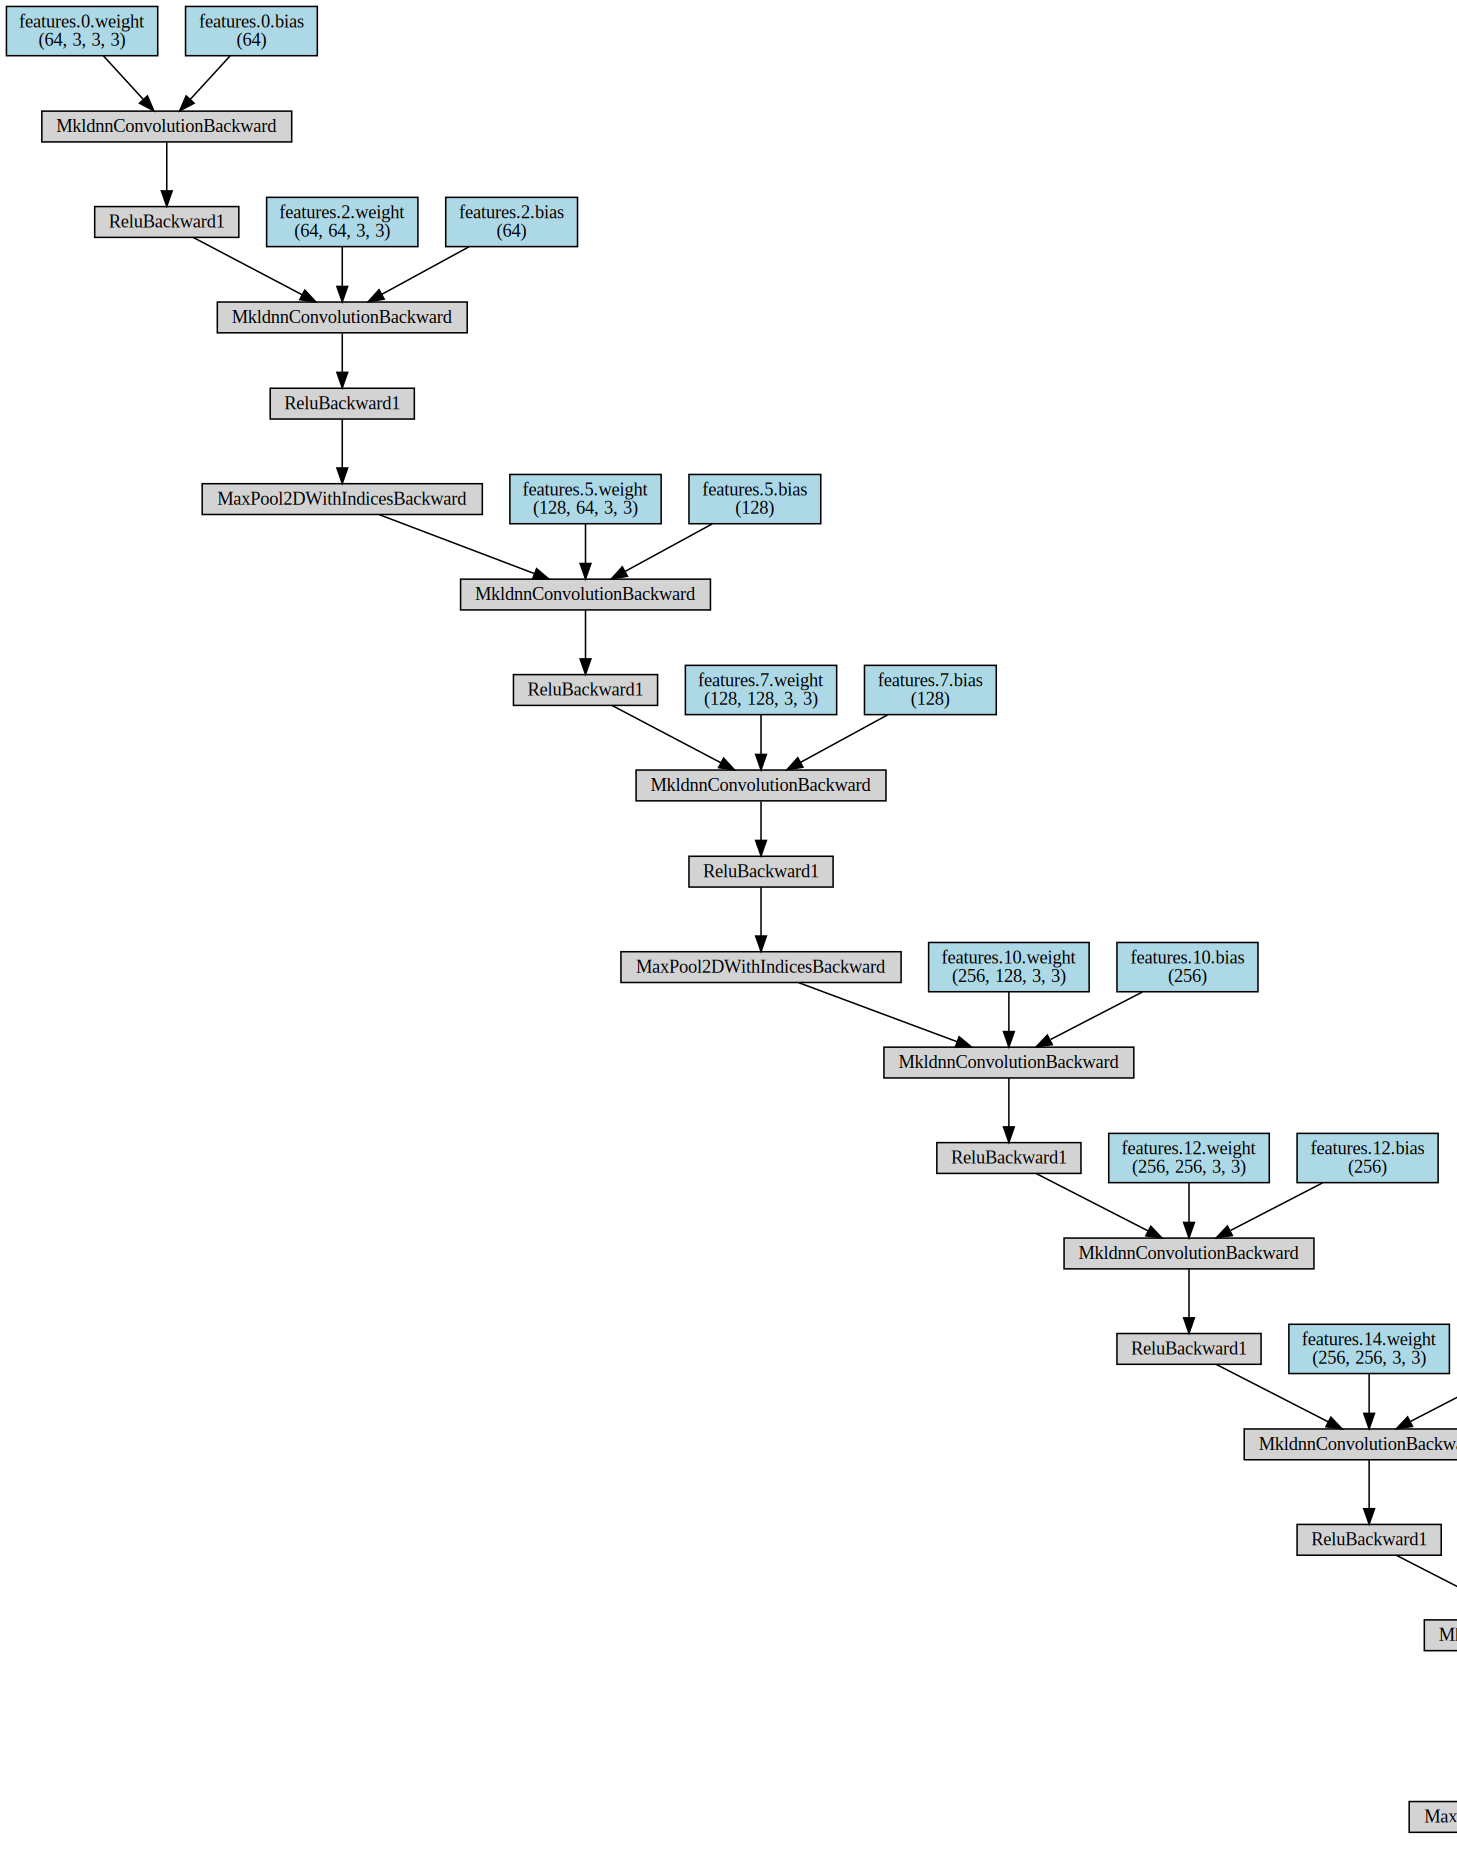

In [3]:
from main import get_args
# from model import cycleGAN
from torchviz import make_dot
import torch
from torch.autograd import Variable
import torchvision.models as models

Da = models.vgg19(pretrained=True)
inputs = torch.randn(1, 3, 256, 256)
y = Da(Variable(inputs))

make_dot(y, params=dict(Da.named_parameters()))
